# Closer Look

This includes basic statistics on user centric data, ommiting some very specific analysis for user privacy.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import random

# Read the .csv dataset that was combined from all scraped tweets.
df = pd.read_csv(r'..\init_scrape\user_combined_csv.csv')

c:\Users\charl\anaconda3\envs\capstone\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\charl\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\charl\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [32]:
# Drop tweet text
df = df.drop(columns=['Tweet'])

In [33]:
# Quickly anonymize "User" column
df = df.assign(User=df.User.factorize()[0] + 1)

In [34]:
print(df.User.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


## Quick Analysis of Dataframe

In [35]:
df.head(100)

,User,Date Created,GeoJSON
0,1,2023-04-03 01:32:00+00:00,NaN
1,1,2023-04-03 01:22:18+00:00,NaN
2,1,2023-04-03 01:20:07+00:00,NaN
3,1,2023-04-03 01:13:12+00:00,NaN
4,1,2023-04-02 19:48:48+00:00,NaN
...,...,...,...
95,1,2023-03-08 20:50:10+00:00,NaN
96,1,2023-03-08 19:26:28+00:00,NaN
97,1,2023-03-08 19:15:53+00:00,"-112.3239143, 33.29026"
98,1,2023-03-08 17:22:33+00:00,"-112.3239143, 33.29026"


In [36]:
# Clean the GeoJSON formatting so that it is only a tuple.
df['GeoJSON'] = df['GeoJSON'].str.replace('Coordinates\(longitude=','')
df['GeoJSON'] = df['GeoJSON'].str.replace('latitude=','')
df['GeoJSON'] = df['GeoJSON'].str.replace('\)','')

C:\Users\charl\AppData\Local\Temp\ipykernel_5816\1622113305.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GeoJSON'] = df['GeoJSON'].str.replace('Coordinates\(longitude=','')
C:\Users\charl\AppData\Local\Temp\ipykernel_5816\1622113305.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GeoJSON'] = df['GeoJSON'].str.replace('\)','')


In [37]:
df.head(100)

,User,Date Created,GeoJSON
0,1,2023-04-03 01:32:00+00:00,NaN
1,1,2023-04-03 01:22:18+00:00,NaN
2,1,2023-04-03 01:20:07+00:00,NaN
3,1,2023-04-03 01:13:12+00:00,NaN
4,1,2023-04-02 19:48:48+00:00,NaN
...,...,...,...
95,1,2023-03-08 20:50:10+00:00,NaN
96,1,2023-03-08 19:26:28+00:00,NaN
97,1,2023-03-08 19:15:53+00:00,"-112.3239143, 33.29026"
98,1,2023-03-08 17:22:33+00:00,"-112.3239143, 33.29026"


In [38]:
# Save data 
df.to_csv('user_anon_cleaned.csv',encoding='utf-8')

In [39]:
# Display number of tweets in dataframe
tweet_cnt = len(df)
print("Tweets in dataframe: ", tweet_cnt)

Tweets in dataframe:  25973


In [40]:
#  Count tweets per user
tweet_per = df['User'].value_counts().rename_axis('user').reset_index(name='twt_ttl')

In [41]:
# Create new dataframe bason on non NAN entries
filtered_df = df[df['GeoJSON'].notna()]

In [42]:
geo_per = filtered_df['User'].value_counts().rename_axis('user').reset_index(name='geo_ttl')

In [43]:
# Display number of GeoJSON tweets in dataframe
geojson_cnt = len(filtered_df)
print("GeoJSOn Tweets in dataframe: ", geojson_cnt)

GeoJSOn Tweets in dataframe:  11240


In [44]:
# Display percentage of tweets in dataframe
print("Percentage of GeoJSON Tweets:","{0:.2%}".format(geojson_cnt/tweet_cnt))

Percentage of GeoJSON Tweets: 43.28%


## Breakdown by Location

In [45]:
# Find reoccuring GoeJSON locations and create a new dataframe
loc_df = filtered_df['GeoJSON'].value_counts().rename_axis('location').reset_index(name='frequency')
loc_df.head(110)

,location,frequency
0,"2.0939983, 41.9864908",1001
1,"-118.668404, 33.704538",964
2,"-112.3239143, 33.29026",750
3,"-2.4094209, 53.4316145",653
4,"-88.294633, 41.444387",605
...,...,...
105,"-105.109815, 39.614151",3
106,"43.837312, 25.930033",3
107,"41.2580436, 24.6072412",3
108,"-87.8248323, 41.506533",3


In [46]:
# Find the number of locations in the dataset
print("Number of unique locations in dataset: ",len(loc_df))

Number of unique locations in dataset:  234


In [47]:
# Split GeoJSON coordinates into separate columns

temp1 = loc_df['location'].str.split(",", n=2, expand=True).astype(float)
loc_df = pd.merge(loc_df, temp1, left_index=True, right_index=True)

loc_df = loc_df.rename(columns={0: 'Long', 1: 'Lat'})
loc_df.head()

,location,frequency,Long,Lat
0,"2.0939983, 41.9864908",1001,2.093998,41.986491
1,"-118.668404, 33.704538",964,-118.668404,33.704538
2,"-112.3239143, 33.29026",750,-112.323914,33.290260
3,"-2.4094209, 53.4316145",653,-2.409421,53.431615
4,"-88.294633, 41.444387",605,-88.294633,41.444387


In [48]:
# Import Shapefiles source:
gdf = gpd.GeoDataFrame(loc_df, geometry=gpd.points_from_xy(loc_df.Long, loc_df.Lat))

In [49]:
# US State level shapefile
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'
state_gdf = gpd.read_file(url_state)

#Exclude everthing outside the contiguous US:
exclude_list = [15, 72, 2, 60, 66, 69, 78]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]

#state_gdf = state_gdf.to_crs(4326)

In [50]:
#url_world = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip'

world_gdf = gpd.read_file("../data/ne_10m_admin_1_states_provinces.zip")

Text(0.5, 1.0, 'Tweet Locations')

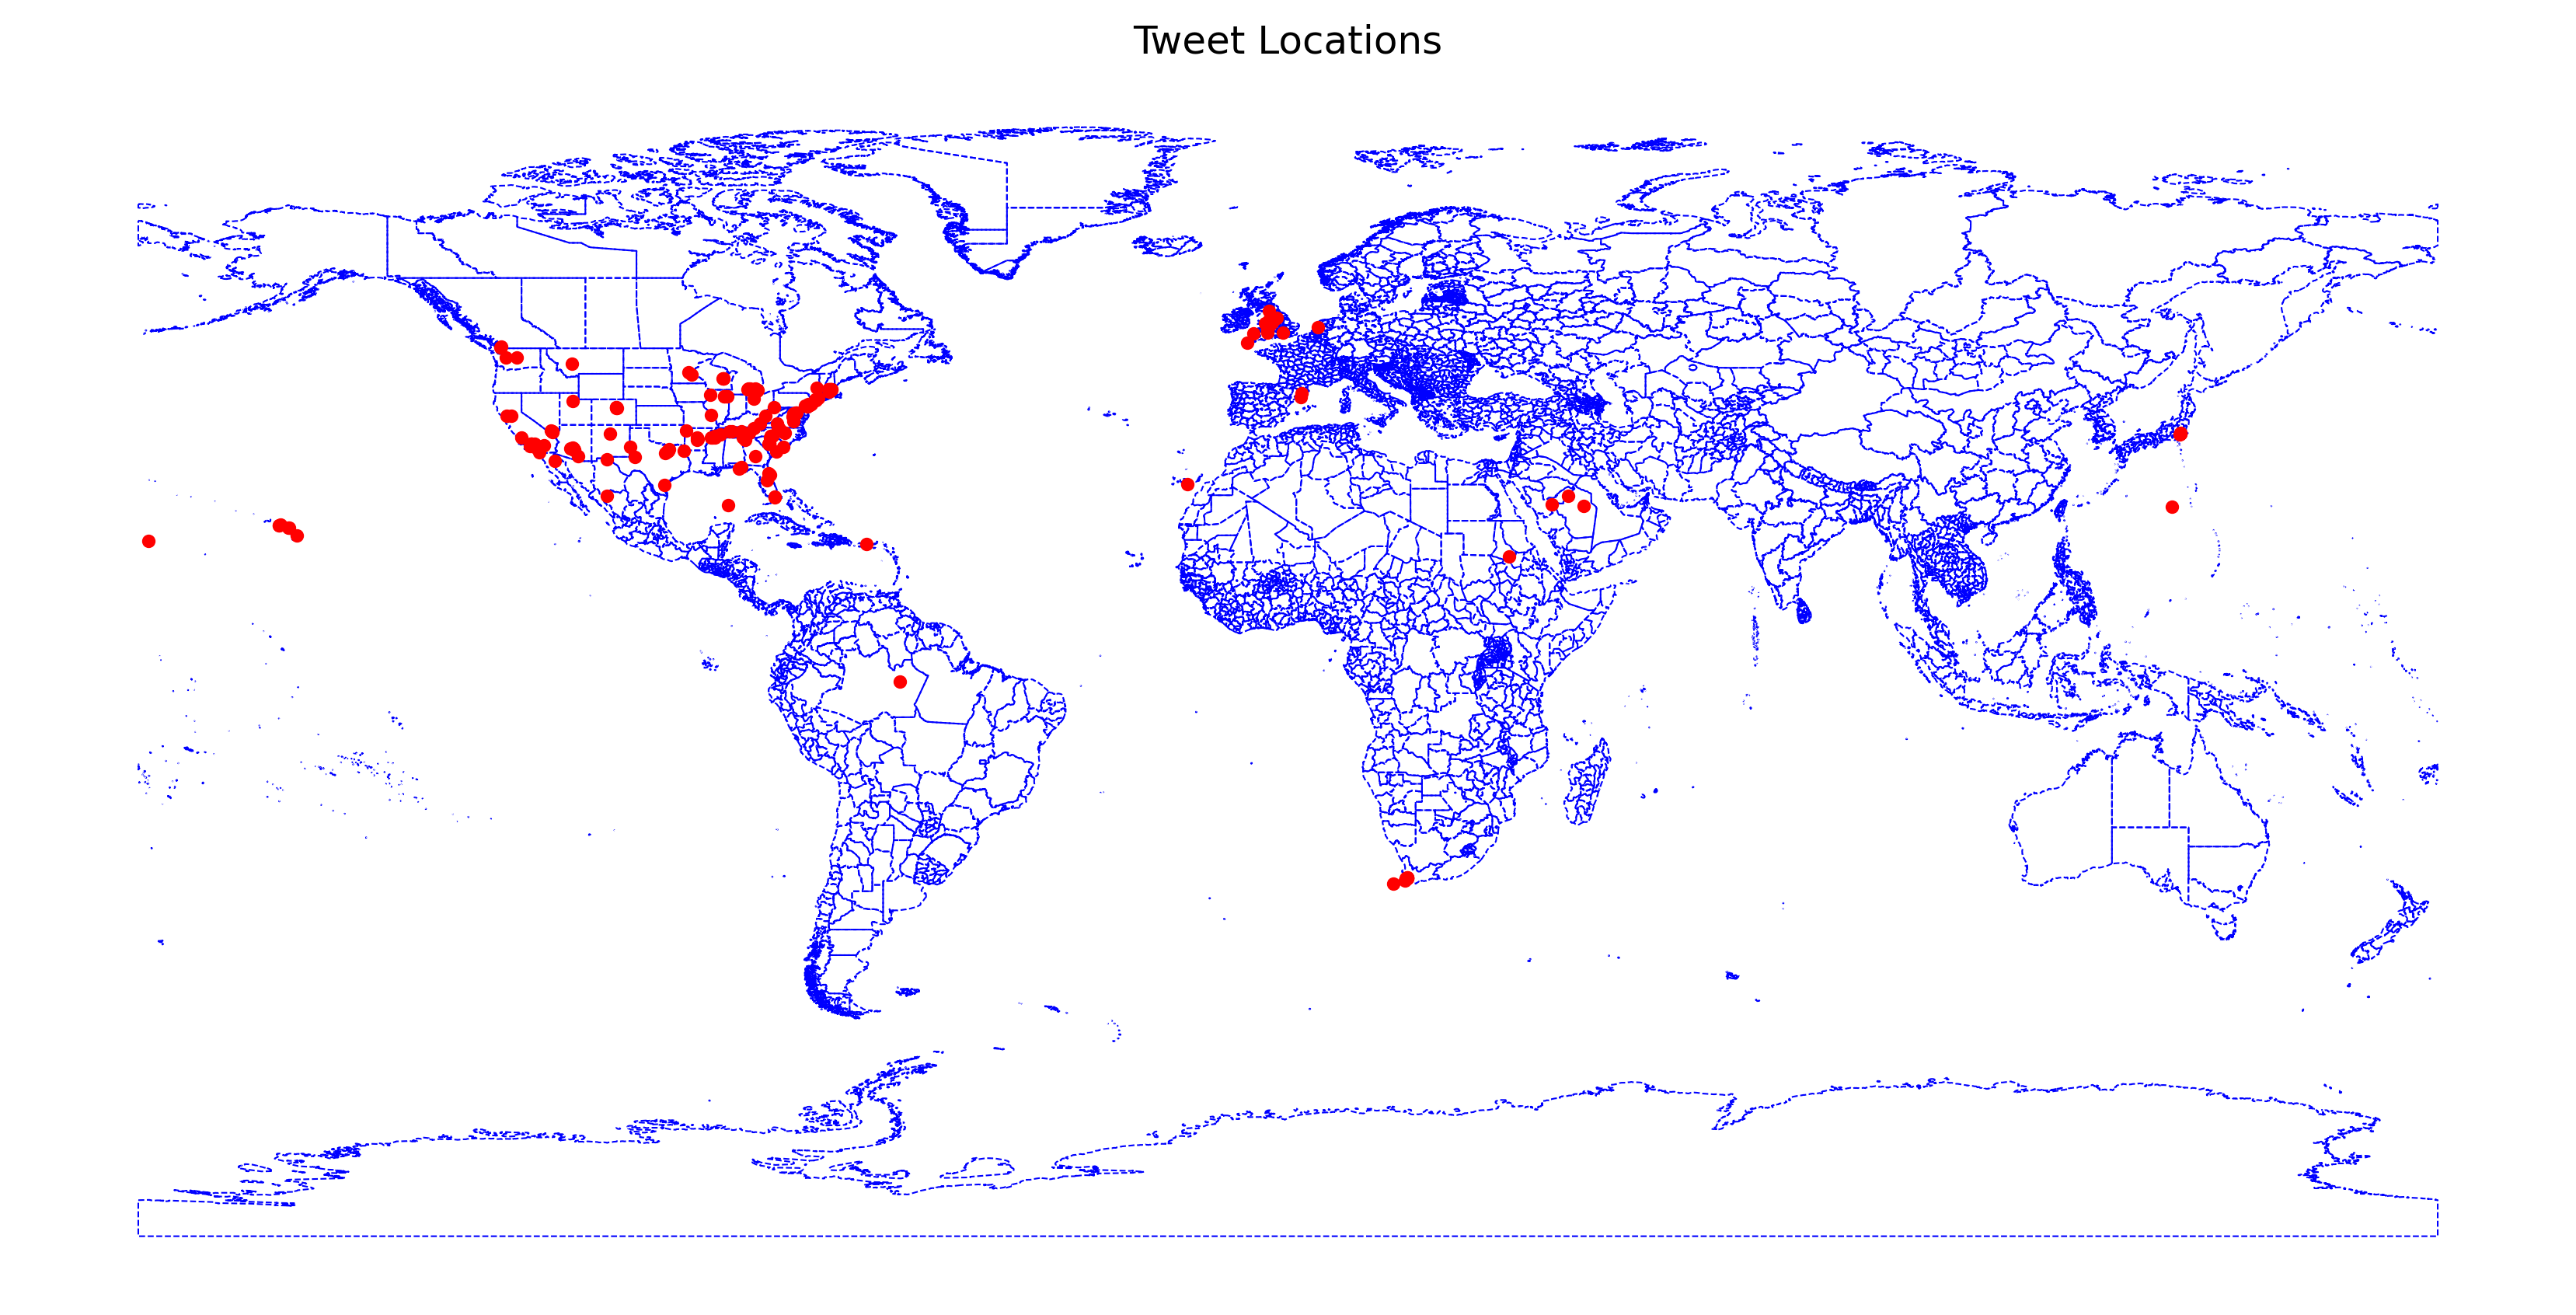

In [51]:
# Plot GeoJSON locations

fig, ax1 = plt.subplots(1,1, figsize=(14, 10), dpi=300)

world_gdf.plot(ax=ax1, linewidth = .5, linestyle= 'dashed', edgecolor = 'blue', facecolor='none')
gdf.plot(ax=ax1, markersize=10, color='red')

ax1.set_axis_off()
ax1.set_title("Tweet Locations")

## Breakdown By User

In [52]:
# Create a new dataframe of GeoJSON tweets per user

user_tweet_counts = filtered_df['User'].value_counts().rename_axis('user').reset_index(name='counts')

In [53]:
# Generate descriptive stats of dataframe based on GeoJSON tweets
user_tweet_counts.counts.describe()

count      29.000000
mean      387.586207
std       269.115286
min        10.000000
25%       146.000000
50%       371.000000
75%       549.000000
max      1001.000000
Name: counts, dtype: float64

<AxesSubplot: title={'center': 'GeoJSON Tweets per User'}, xlabel='User', ylabel='GeoJSON Tweet Count'>

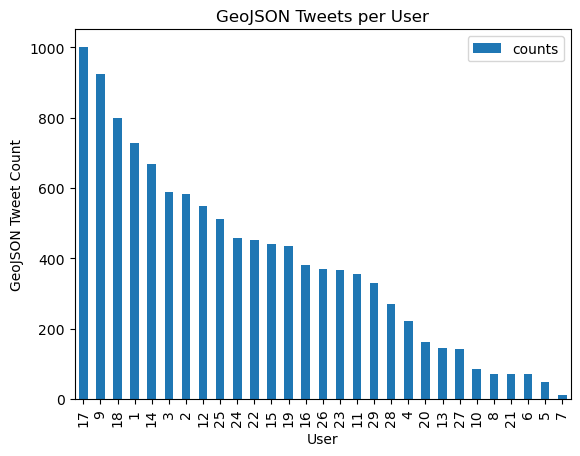

In [54]:
# Create a bar plot of GeoJSON tweets per user
user_tweet_counts.plot.bar(x='user', y='counts',
    title='GeoJSON Tweets per User',
    xlabel="User", 
    ylabel="GeoJSON Tweet Count")

The above bar graph shows the amount of GeoJSON tweets per user.

In [55]:
geo_pct = tweet_per.merge(geo_per, how='left', on='user')
geo_pct['geo/twt'] = np.where(geo_pct['twt_ttl'] < 1, geo_pct['twt_ttl'], geo_pct['geo_ttl']/geo_pct['twt_ttl'])
geo_pct = geo_pct.sort_values('geo/twt', ascending=False)
geo_pct

,user,twt_ttl,geo_ttl,geo/twt
28,7,10,10,1.000000
12,17,1001,1001,1.000000
18,9,1001,923,0.922078
11,18,1001,799,0.798202
0,1,1001,729,0.728272
15,14,1001,669,0.668332
22,3,1001,589,0.588412
1,2,1001,583,0.582418
16,12,1001,549,0.548452
5,25,1001,513,0.512488


<AxesSubplot: title={'center': 'Percentage of GeoJSON Tweets per User'}, xlabel='User', ylabel='Percentage of Tweets'>

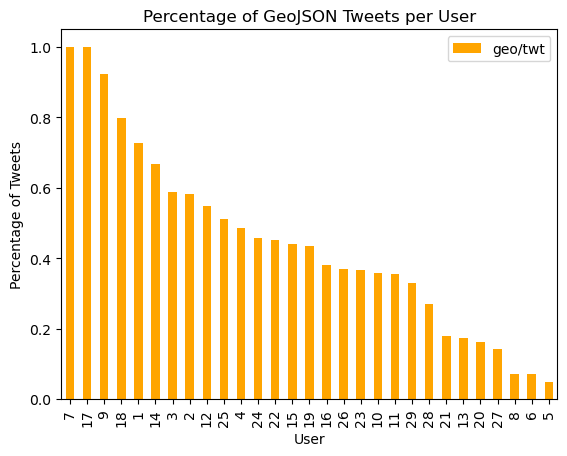

In [56]:
# Create a bar plot of GeoJSON tweets per user as a percentage of their tweet total
geo_pct.plot.bar(x='user', y='geo/twt',
    color='orange',
    title='Percentage of GeoJSON Tweets per User',
    xlabel="User", 
    ylabel="Percentage of Tweets")

In [57]:
# Find the frequency of a location per user
loc_count_by_user_df = df.groupby('User')['GeoJSON'].value_counts().to_frame()

In [58]:
loc_count_by_user_df.head(100)

GeoJSON
User GeoJSON                         
1    -112.3239143, 33.29026       722
     -111.894548, 33.306275         5
     -111.972849, 33.2037607        1
     -111.979047, 33.3199453        1
2    -71.862751, 42.543916        299
...                               ...
16   -75.094559, 40.179698        288
     -74.928522, 40.170787         50
     -80.519851, 39.719801         13
     -74.898856, 40.1252816         7
     -75.00239, 40.139757           6

[100 rows x 1 columns]

In [59]:
# Save data 
#loc_count_by_user_df.to_csv('loc_count_by_user.csv',encoding='utf-8')

In [60]:
# Read the .csv dataset that was just saved
df2 = pd.read_csv(r'..\init_scrape\loc_count_by_user.csv')
df2['GeoJSON'] = df2['GeoJSON'].str.replace('[^0-9.]', '')
df2['GeoJSON'] = df2['GeoJSON'].astype(int)
df2 = df2.rename(columns={"GeoJSON": "Location"})
df2

C:\Users\charl\AppData\Local\Temp\ipykernel_5816\2614076075.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['GeoJSON'] = df2['GeoJSON'].str.replace('[^0-9.]', '')


,User,Location,Frequency
0,1,1,722
1,1,2,5
2,1,3,1
3,1,4,1
4,2,1,299
...,...,...,...
257,28,3,4
258,28,4,4
259,28,5,3
260,29,1,328


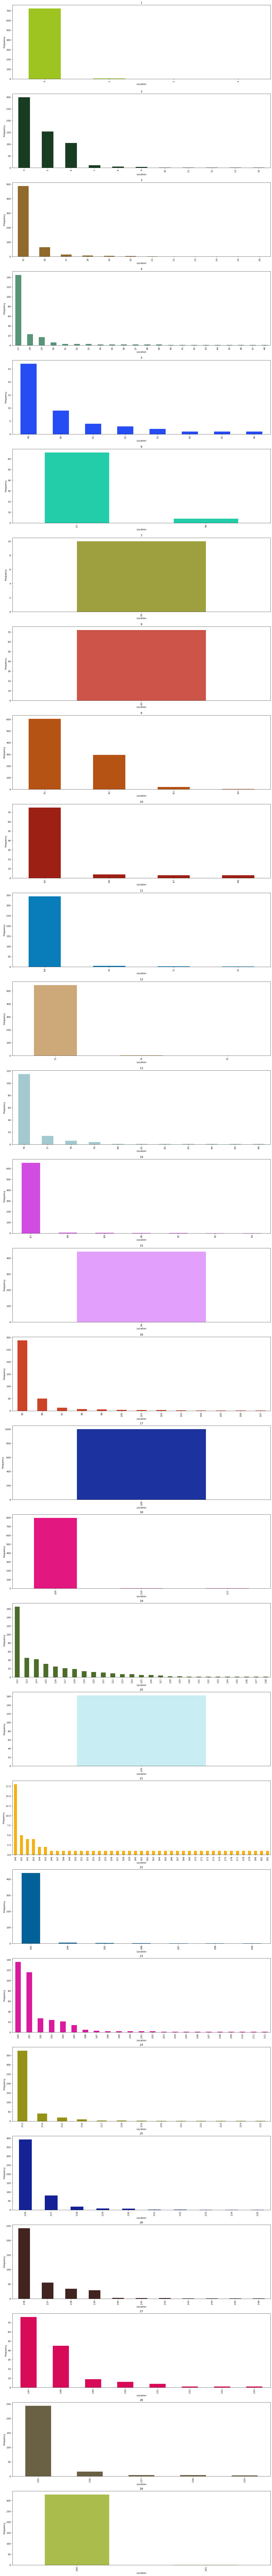

In [61]:
user_grps = df2.groupby('User')
fig, axs = plt.subplots(nrows=len(user_grps), ncols=1, figsize=(20,200))

for ax,(i, sub) in zip(axs, user_grps):
    
    #user_grps['Location'].unique()

    

    # Create Random Color
    hexadecimal = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    
    sub['Frequency'].plot(kind='bar', legend=False, title=i, ax=ax, color=hexadecimal, sharex=False,
                          xlabel="Location", ylabel="Frequency", y=user_grps['Location'])

plt.show()
